In [ ]:
import pandas as pd
import manager as m
from openai_textgen import TextGenerator
from datamodel import Goal
from datamodel import Summary, Persona

llm_config = {"n":1, "temperature": 0, }
text_gen = TextGenerator()

In [ ]:
df = pd.read_excel("../data/ROBERT_KING.xlsx", index_col=0)
nlviz = m.Manager(text_gen=text_gen, data=df)
data_summary = nlviz.summarize(textgen_config=llm_config, summary_method="default")

In [ ]:
display(Summary(**data_summary))

# Suggest questions to ask based on dataset

In [ ]:
display(Summary(**data_summary))

In [ ]:
from datamodel import Persona
persona= Persona(persona="A highly skilled data analyst who can come up with complex, insightful goals about data",rationale="")
goals = nlviz.goals(
        summary=data_summary,
        textgen_config=llm_config,
        n = 3,
        persona=persona)

for g in goals:
    display(g)

In [ ]:
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=goals[0], textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
print(charts[0].code)

In [ ]:
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=goals[1], textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
print(charts[0].code)

In [ ]:
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=goals[2], textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
print(charts[0].code)

# Generate plots based on user questions

In [ ]:
question = "what is the distribution of transaction purposes ?"
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
question = "What is the break down of total transaction amounts (in thousand dollars) per transaction category?"
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
question = "What is the break down of total transaction amounts (in thousand dollars) per transaction purpose?"
viz_spces = "Avoid labels in the plot and rotate x labels by 90 degrees"
goal = Goal(question=question, visualization=viz_spces, rationale="")
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=goal, textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
question = "show the evolution of monthly transaction amounts over time, broken down by transaction category"
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)
charts[0]

In [ ]:
question = "analyze the transaction amount trends over the two-month period."
# viz_specs = "stacked bar chart"
# goal = Goal(question=question, visualization=viz_spces, rationale="")
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)
charts[0]

```python
import matplotlib.pyplot as plt
import pandas as pd

# plan -
def plot(data: pd.DataFrame):
    transaction_amounts = data['Transaction_Amount']
    plt.pie(transaction_amounts, labels=data['Transaction_Description'], autopct='%1.1f%%')
    plt.title('Distribution of Transaction Amounts')
    plt.legend()
    return plt

chart = plot(data) # data already contains the data to be plotted. Always include this line. No additional code beyond this line.
```
****
 Wedge sizes 'x' must be non negative values


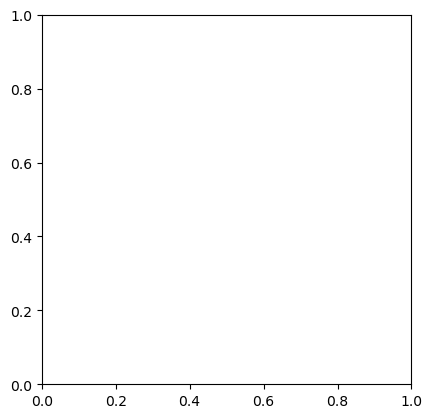

In [4]:
question = "what is the distribution of transaction amounts (pie chart)"
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)

In [5]:
print(charts[0].code)

import matplotlib.pyplot as plt
import pandas as pd

# plan -
def plot(data: pd.DataFrame):
    transaction_amounts = data['Transaction_Amount']
    plt.pie(transaction_amounts, labels=data['Transaction_Description'], autopct='%1.1f%%')
    plt.title('Distribution of Transaction Amounts')
    plt.legend()
    return plt

chart = plot(data)


In [6]:
code = charts[0].code
eval_report = nlviz.evaluate(code=code, goal=Goal(question=question, visualization=question ,rationale=""), summary=data_summary, textgen_config=llm_config)

In [18]:
for dim in eval_report[0]:
    print(f"{dim['dimension'].title()}: {dim['score']}/10")
    r = dim['rationale']
    r = ".\n".join(r.split('.'))
    print(f"Rationale: \n {r}")
    print(f"{''.join(10*['*'])}")


Bugs: 8/10
Rationale: 
 The code does not have any syntax errors or typos.
 However, there is a potential bug in the data transformation step.
 The code directly uses the 'Transaction_Amount' column for the pie chart without any aggregation or grouping.
 This may result in a pie chart with too many slices, making it difficult to interpret.

**********
Transformation: 4/10
Rationale: 
 The data transformation step is not appropriate for the visualization type.
 The code directly uses the 'Transaction_Amount' column for the pie chart without any aggregation or grouping.
 To visualize the distribution of transaction amounts, it would be more appropriate to group the amounts into categories (e.
g.
, bins) and then create a pie chart based on the frequency of each category.

**********
Compliance: 6/10
Rationale: 
 The code partially meets the specified goal of visualizing the distribution of transaction amounts.
 However, the lack of appropriate data transformation makes it difficult to ac

In [19]:
question = "What are the total inflow and outflow transaction amounts per transactiontype? (rotate_the_labels)"
nlviz = m.Manager(text_gen=text_gen, data=df)
charts = nlviz.visualize(summary=data_summary, goal=question, textgen_config=llm_config, return_error=True)
code = charts[0].code
eval_report = nlviz.evaluate(code=code, goal=Goal(question=question, visualization=question ,rationale=""), summary=data_summary, textgen_config=llm_config)
for dim in eval_report[0]:
    print(f"{dim['dimension'].title()}: {dim['score']}/10")
    r = dim['rationale']
    r = ".\n".join(r.split('.'))
    print(f"Rationale: \n {r}")
    print(f"{''.join(10*['*'])}")

Bugs: 10/10
Rationale: 
 The code does not contain any bugs, logic errors, syntax errors, or typos.
 It is written correctly and is expected to compile without any issues.

**********
Transformation: 10/10
Rationale: 
 The data is appropriately transformed for the visualization type.
 The code filters the data based on positive and negative transaction amounts to separate inflow and outflow transactions.
 It then calculates the total inflow and outflow transaction amounts per transaction type using groupby.
 This transformation is necessary to obtain the desired information.

**********
Compliance: 10/10
Rationale: 
 The code meets the specified visualization goal of showing the total inflow and outflow transaction amounts per transaction type.
 It accurately calculates and displays this information in the chart.

**********
Type: 8/10
Rationale: 
 The visualization type (bar chart) is appropriate for comparing the total inflow and outflow transaction amounts per transaction type.
 How

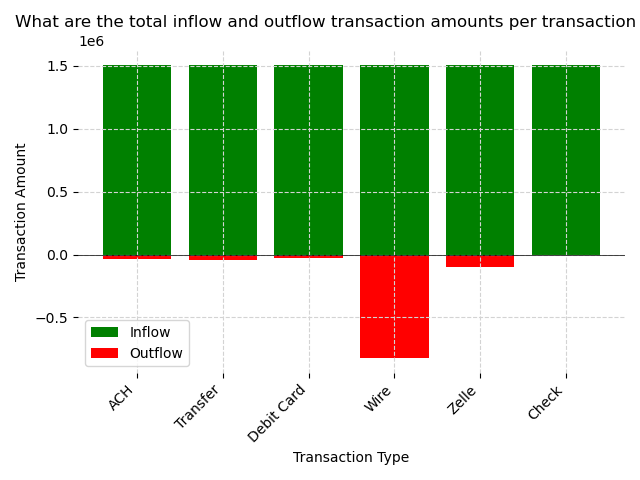

In [21]:
charts[0]